In [44]:
from pydataset import data
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib as plt
import seaborn as sns
import scipy.stats as st

In [27]:
df_wine = pd.read_csv("datos/winequality-white.csv", sep=";") #puestos-empleados
df_wine.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1935,8.8,0.34,0.33,9.7,0.036,46.0,172.0,0.9966,3.08,0.4,10.2,5


In [28]:
df_wine['quality'].mean()

5.87790935075541

1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:

- Tabla de contingencia

In [29]:
def ver_valores(col): 
    if col <= 4:
        return "baja"
    elif col > 4.0 and col <= 5.0:
        return "media"
    else:
        return "alta"
    #calculando previamente la media de qualitu, establecemos unos valores para categorizarla 


In [30]:
df_wine['alcohol'].mean()

10.514267047774638

In [31]:
def ver_alcohol(col): 
    if col <= 7:
        return "baja"
    elif col > 7.0 and col <= 11.0:
        return "media"
    else:
        return "alta"
    #el mismo proceso que con la columna quality, pero con la columna alcohol

In [32]:
df_wine["alc_cat"] = df_wine["alcohol"].apply(ver_alcohol)

In [33]:
df_wine["qual_cat"] = df_wine["quality"].apply(ver_valores) #categorizando el dataframe


In [34]:
df_wine.sample(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alc_cat,qual_cat
1139,9.0,0.31,0.49,6.9,0.034,26.0,91.0,0.99370,2.99,0.34,11.5,5,alta,media
2032,6.5,0.25,0.20,1.4,0.024,29.0,101.0,0.99160,3.24,0.54,10.8,6,media,alta
1478,7.9,0.22,0.24,4.6,0.044,39.0,159.0,0.99270,2.99,0.28,11.5,6,alta,alta
3864,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7,alta,alta
2548,6.3,0.26,0.42,7.1,0.045,62.0,209.0,0.99544,3.20,0.53,9.5,6,media,alta
2861,6.4,0.21,0.28,5.9,0.047,29.0,101.0,0.99278,3.15,0.40,11.0,6,media,alta
1282,7.4,0.31,0.74,10.7,0.039,51.0,147.0,0.99770,3.02,0.43,8.7,5,media,media
2212,7.0,0.32,0.35,1.5,0.039,24.0,125.0,0.99180,3.17,0.64,12.2,6,alta,alta
2834,6.2,0.15,0.27,1.4,0.041,51.0,117.0,0.99090,3.28,0.38,11.2,6,alta,alta
2164,8.4,0.22,0.28,18.8,0.028,55.0,130.0,0.99800,2.96,0.35,11.6,5,alta,media


In [35]:
df_wine_crosstab = pd.crosstab(df_wine['qual_cat'],
                         df_wine['alc_cat']      )
df_wine_crosstab

alc_cat,alta,media
qual_cat,,
alta,1384,1874
baja,37,146
media,140,1317


- Coeficiente de correlación de las variables numéricas del dataset.

In [36]:
matriz_corr = df_wine.corr()
matriz_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


<AxesSubplot:>

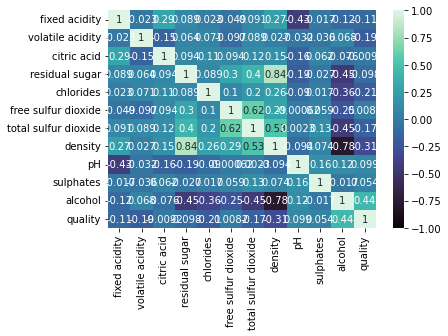

In [47]:
figsize = (40,40)

sns.heatmap(df_wine.corr(), cmap = "mako", annot = True, vmin = -1, vmax = 1) 

#la correlación entre alcohol y quality es positiva


- Sesgos de alguna de las variables numéricas del dataset.

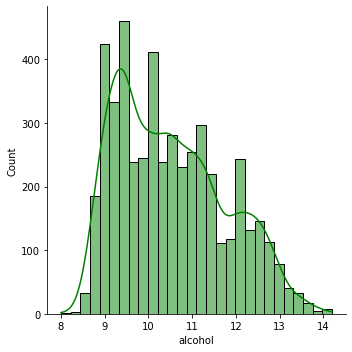

In [ ]:
sns.displot(df_wine["alcohol"], 
            color = "green", 
            kde = True)

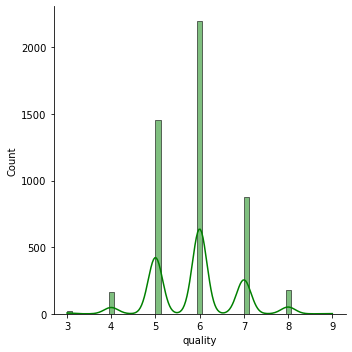

In [ ]:
sns.displot(df_wine["quality"],
            color = "green",
            kde = True)

- Intervalo de confianza de algunas de las variables numéricas del dataset

In [45]:
datos = df_wine['quality']
print(st.t.interval(alpha=0.95, df=len(datos)-1, loc=np.mean(datos), scale=st.sem(datos)))
print(np.mean(datos))

(5.853100732289913, 5.902717969220908)
5.87790935075541


In [46]:
datos1 = df_wine['alcohol']
print(st.t.interval(alpha=0.95, df=len(datos1)-1, loc=np.mean(datos1), scale=st.sem(datos1)))
print(np.mean(datos1))

(10.479794750604889, 10.548739344944387)
10.514267047774638


2. Interpretación de los resultados.

- Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos

Los resultados que hemos obtenido eran lo esperado. 

Hemos trabajado con las columnas de quality y alcohol, con propósito de acercar mejor los resultados a una interpretación popular.

De ambas columnas podemos observar por los resultados estadísticos que se comportan adecuadamente con respecto a la media. 

Relacionando quality y alcohol, se puede apreciar en el heatmap que es una correlación moderada, no parece ir ligada necesariamente la calidad a los niveles de alcohol y viceversa. 

EL intervalo de confianza nos ofrece lo que esperábamos, en torno a la media se va moviendo este intervalo en ambas variables.

EL sesgo en ambas columnas está dirigido a la derecha, de forma ligera en quality y más pronunciadamente en alcohol. No hay demasiada simetría.